<a href="https://colab.research.google.com/github/OlhaDot/NewProjectStadyAcademy/blob/master/STRESS_TEST_AVAL_as_of_31_12_2023%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
url = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/makro_history_startY.csv'
data = pd.read_csv(url, sep=';')
print(data.head())


       Date   GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20071231   8.2           6.4     12.8          6.9          5.1   
1  20081231   2.2           6.4     25.3          7.7          5.3   
2  20091231 -15.1           8.8     16.0         10.9          7.8   
3  20101231   4.1           8.1      9.4         10.5          7.9   
4  20111231   5.5           7.9      8.0         11.1          8.0   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop        DR  
0           8.0          7.4          5.1  0.124380  
1          12.0         10.9          7.7  0.153751  
2          10.3         11.4          8.0  0.279171  
3           7.8         10.6          8.0  0.110035  
4           7.8         10.3          8.0  0.052725  


In [3]:
data2 = data.copy()
# data2.drop('data', axis=1, inplace=True)

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          17 non-null     int64  
 1   GDP           17 non-null     float64
 2   Unemployment  17 non-null     float64
 3   CPI_avg       17 non-null     float64
 4   EUR_UAH_avg   17 non-null     float64
 5   USD_UAH_avg   17 non-null     float64
 6   Key_rate_eop  17 non-null     float64
 7   EUR_UAH_eop   17 non-null     float64
 8   USD_UAH_eop   17 non-null     float64
 9   DR            17 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.5 KB


(array([ 3.,  5.,  5., 19.,  5.,  5.,  9.,  8.,  4.,  2.,  4.,  2.,  4.,
         0.,  1.,  2.,  2.,  1.,  0.,  0.,  1.,  2.,  4.,  1.,  1.,  2.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.]),
 array([0.01222617, 0.02048231, 0.02873844, 0.03699458, 0.04525071,
        0.05350685, 0.06176298, 0.07001912, 0.07827526, 0.08653139,
        0.09478753, 0.10304366, 0.1112998 , 0.11955593, 0.12781207,
        0.1360682 , 0.14432434, 0.15258047, 0.16083661, 0.16909274,
        0.17734888, 0.18560501, 0.19386115, 0.20211728, 0.21037342,
        0.21862956, 0.22688569, 0.23514183, 0.24339796, 0.2516541 ,
        0.25991023, 0.26816637, 0.2764225 , 0.28467864, 0.29293477,
        0.30119091, 0.30944704, 0.31770318, 0.32595931, 0.33421545,
        0.34247159]),
 <BarContainer object of 40 artists>)

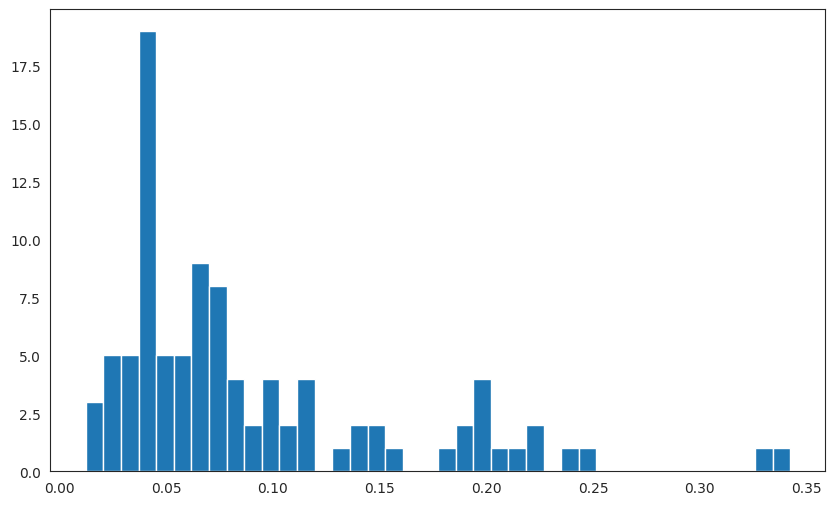

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data2['DR'], bins = 40)

In [ ]:
data2.describe()

,GDP,Unemployment,Inflation,add1,add2,DR
count,96.000000,96.000000,96.000000,0.0,0.0,96.000000
mean,-2.771875,9.314792,6.818860,NaN,NaN,0.090590
std,3.629912,0.498186,10.059747,NaN,NaN,0.068718
min,-16.000000,7.600000,-0.500302,NaN,NaN,0.012226
25%,-3.932500,9.207500,3.317500,NaN,NaN,0.042284
50%,-3.695000,9.405000,3.555000,NaN,NaN,0.067024
75%,-1.300000,9.600000,3.792500,NaN,NaN,0.113374
max,4.700000,10.500000,58.926844,NaN,NaN,0.342472


CORRELATIONS

In [ ]:
data.corr()

,data,GDP,Unemployment,Inflation,add1,add2,DR
data,1.000000,-0.293401,0.253081,-0.380295,NaN,NaN,-0.167761
GDP,-0.293401,1.000000,0.463746,-0.257266,NaN,NaN,0.476377
Unemployment,0.253081,0.463746,1.000000,-0.492793,NaN,NaN,0.115805
Inflation,-0.380295,-0.257266,-0.492793,1.000000,NaN,NaN,0.203940
add1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
add2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DR,-0.167761,0.476377,0.115805,0.203940,NaN,NaN,1.000000


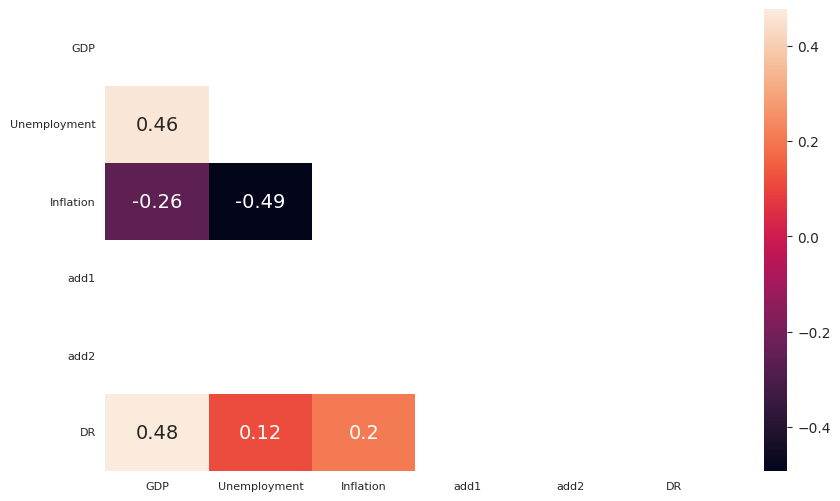

In [ ]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(data2.corr(), dtype=bool))
sns.heatmap(data2.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

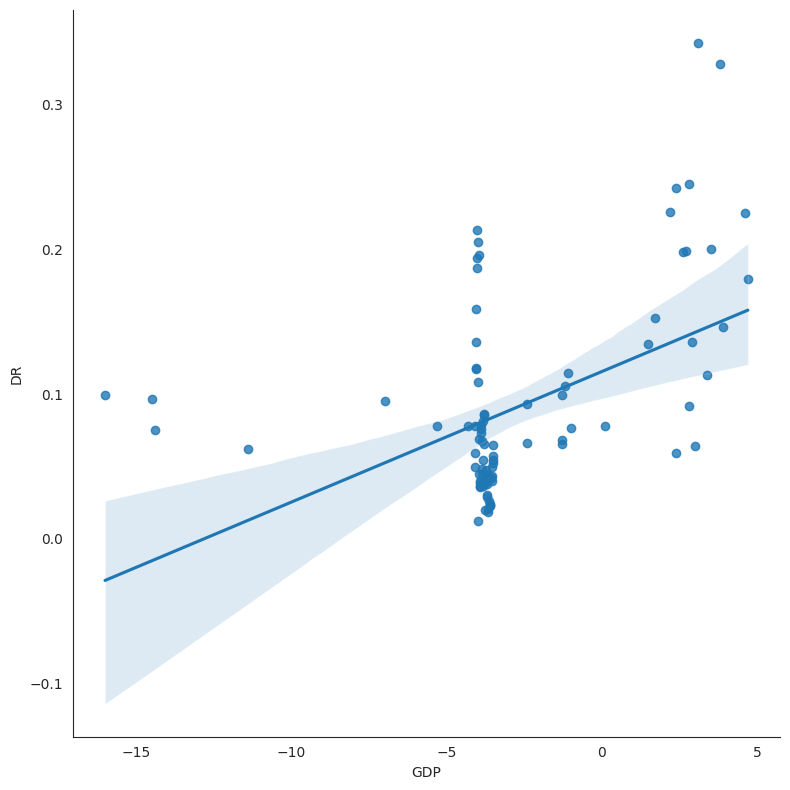

In [ ]:
sns.lmplot(x='GDP', y='DR', data=data2, height=8)
plt.show()

In [ ]:
# origin model
DR_orign = data2["DR"]
macroparam = data2.drop(['DR', 'add1', 'add2'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(macroparam, DR_orign, test_size=0.2, random_state=0)

# model train
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

print('Training data r-squared:', LinReg.score(X_train, y_train))
print('Test data r-squared:', LinReg.score(X_test, y_test))

Training data r-squared: 0.3127018663523695
Test data r-squared: 0.36397174446287706


In [ ]:
# P-value
model = sm.OLS(y_train, X_train)
results = model.fit()

pd.DataFrame({'coef': results.params, 'P_value': round(results.pvalues,3)})
# P-value shoul be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
GDP,0.009239,0.000
Unemployment,0.010475,0.000
Inflation,0.002514,0.001


TRAINING PART

In [ ]:
# pay attention what you are dropping
DR = data2["DR"]
macro = data2.drop(['DR', 'add1', 'add2'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(macro, DR, test_size=0.2, random_state=0)

In [ ]:
# model train
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept:', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = X_train.columns, columns = ['coef'])

Training data r-squared: 0.3127018663523695
Test data r-squared: 0.36397174446287706
Intercept: 0.15277532058806859


,coef
GDP,0.010191
Unemployment,-0.005321
Inflation,0.002081


In [ ]:
data2['DR'].skew()

1.5568710448465064

In [ ]:
data2['DR'].min()

0.012226173

In [ ]:
y_log = np.log(data2['DR'])
y_log.tail()


91   -2.135044
92   -2.145182
93   -2.550838
94   -2.822807
95   -3.003101
Name: DR, dtype: float64

In [ ]:
y_log.skew()

0.15158748338311348

<ipython-input-83-8228d1824536>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


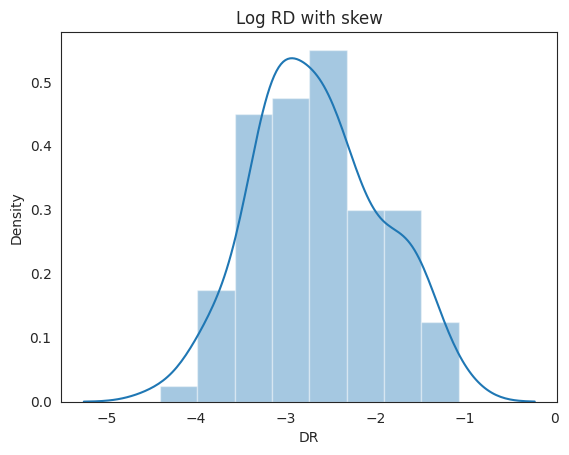

In [ ]:
sns.distplot(y_log)
plt.title('Log RD with skew')
plt.show()

REGRETION USING log DR

In [ ]:
DR_log = np.log(data2['DR'])
macros = data2.drop(['DR', 'add1', 'add2'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(macros, DR_log, test_size=0.2, random_state=0)

regr2 = LinearRegression()
regr2.fit(X_train, y_train)


print('Training data r-squared:', regr2.score(X_train, y_train))
print('Test data r-squared:', regr2.score(X_test, y_test))

print('Intercept:', regr2.intercept_)
pd.DataFrame(data = regr2.coef_, index = X_train.columns, columns = ['coef'])

Training data r-squared: 0.2767114075338426
Test data r-squared: 0.33586708706628454
Intercept: -0.34625568752173397


,coef
GDP,0.102417
Unemployment,-0.229302
Inflation,0.018946


**What we can drop to make better model score**

In [ ]:
# P-value
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'P_value': round(results.pvalues,3)})
# P-value shoul be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
const,-0.346256,0.834
GDP,0.102417,0.000
Unemployment,-0.229302,0.182
Inflation,0.018946,0.035


In [ ]:
# VIF - multicollinearity - should be less as possible < 5/10
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.round(vif, 2)})

,coef_name,vif
0,const,636.36
1,GDP,1.29
2,Unemployment,1.74
3,Inflation,1.42


In [ ]:
# BIC -less BIC - better

In [ ]:
#  Original model or LOG model - to decide
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
result = model.fit()

orign_coef = pd.DataFrame({'coef_name': result.params, 'p-value': np.round(results.pvalues, 3)})

print('BIC is:', results.bic)
print('r-squared:', results.rsquared)

BIC is: 142.73050847535387
r-squared: 0.2767114075338425


In [ ]:
#  Original model or LOG model - to decide  WO Unemployment
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Unemployment'], axis = 1)

model2 = sm.OLS(y_train, X_incl_const)
result2 = model2.fit()

orign_coef_wo_Unempl = pd.DataFrame({'coef_name': result2.params, 'p-value': round(result2.pvalues, 3)})

print('BIC is:', result2.bic)
print('r-squared:', result2.rsquared)

BIC is: 140.2964305007933
r-squared: 0.25843390545679423


In [ ]:
#  Original model or LOG model - to decide  WO Unemployment+ Inflation
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['Unemployment', 'Inflation'], axis = 1)

model3 = sm.OLS(y_train, X_incl_const)
result3 = model3.fit()

orign_coef_wo_Unempl_Infl = pd.DataFrame({'coef_name': result3.params, 'p-value': round(result3.pvalues, 3)})

print('BIC is:', result3.bic)
print('r-squared:', result3.rsquared)

BIC is: 146.47993239844945
r-squared: 0.14840633472723896


In [ ]:
#  Original model - to decide  WO Unemployment
model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 138.44672290175077
r-squared: 0.9590786211677362


In [ ]:
#  Original model - to decide  WO Unemployment
X_train = X_train.drop(['Unemployment'], axis = 1)

model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 320.43868093154504
r-squared: 0.5250227080591805


In [ ]:
#  Original model - to decide  WO Inflation
X_train = X_train.drop(['Inflation'], axis = 1)

model_org = sm.OLS(y_train, X_train)
result_org = model_org.fit()

orign_coef= pd.DataFrame({'coef_name': result_org.params, 'p-value': round(result_org.pvalues, 3)})

print('BIC is:', result_org.bic)
print('r-squared:', result_org.rsquared)

BIC is: 321.6073651793936
r-squared: 0.489378937630776


**NEW VARIANT**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from datetime import datetime

In [6]:
url = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/makro_history_startY.csv'
data = pd.read_csv(url, sep=';')
print(data.head())


       Date   GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20071231   8.2           6.4     12.8          6.9          5.1   
1  20081231   2.2           6.4     25.3          7.7          5.3   
2  20091231 -15.1           8.8     16.0         10.9          7.8   
3  20101231   4.1           8.1      9.4         10.5          7.9   
4  20111231   5.5           7.9      8.0         11.1          8.0   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop        DR  
0           8.0          7.4          5.1  0.124380  
1          12.0         10.9          7.7  0.153751  
2          10.3         11.4          8.0  0.279171  
3           7.8         10.6          8.0  0.110035  
4           7.8         10.3          8.0  0.052725  


In [ ]:
# data2 = data.copy()
# data2.drop(['data', 'add1', 'add2'], axis=1, inplace=True)

In [ ]:
# data.drop(['data'], axis=1, inplace=True)
# data

,GDP,Unemployment,Inflation,add1,add2,DR,hist_dat
0,2.40,9.80,2.863995,NaN,NaN,0.059238,31-03-2012
1,3.00,9.20,-0.369418,NaN,NaN,0.063927,30-06-2012
2,-1.30,8.70,-0.033344,NaN,NaN,0.065745,30-09-2012
3,-2.40,8.80,-0.133378,NaN,NaN,0.066180,31-12-2012
4,-1.30,9.50,-0.500302,NaN,NaN,0.099236,31-03-2012
...,...,...,...,...,...,...,...
91,-4.06,9.22,3.240000,NaN,NaN,0.118239,31-12-2023
92,-4.07,9.21,3.230000,NaN,NaN,0.117047,31-03-2023
93,-4.08,9.20,3.220000,NaN,NaN,0.078016,30-06-2023
94,-4.09,9.19,3.210000,NaN,NaN,0.059439,30-09-2023


In [7]:
data2 = data.copy()


In [8]:
data2.describe()

,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop,DR
count,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2.015123e+07,-1.388235,9.347059,13.305882,21.405882,18.364706,12.405882,22.605882,19.382353,0.115115
std,5.049752e+04,9.331860,2.938987,11.165319,11.188022,10.838700,5.462196,11.758692,11.271160,0.072944
min,2.007123e+07,-29.100000,6.400000,-0.300000,6.900000,5.100000,6.000000,7.400000,5.100000,0.041713
25%,2.011123e+07,-3.800000,7.900000,8.000000,10.600000,8.000000,7.800000,10.900000,8.000000,0.052725
50%,2.015123e+07,2.400000,8.800000,12.100000,24.200000,21.800000,12.000000,26.200000,23.700000,0.081292
75%,2.019123e+07,3.500000,9.500000,14.900000,30.800000,27.000000,14.500000,31.700000,27.700000,0.153751
max,2.023123e+07,8.200000,18.000000,48.500000,39.600000,36.600000,25.000000,42.200000,38.000000,0.279171


In [9]:
data2.corr()

,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop,DR
Date,1.000000,-0.203057,0.729812,-0.046668,0.955365,0.952126,0.454315,0.941839,0.940302,-0.230794
GDP,-0.203057,1.000000,-0.585000,-0.355284,-0.147659,-0.176901,-0.566447,-0.234906,-0.251570,-0.700942
Unemployment,0.729812,-0.585000,1.000000,0.160590,0.696679,0.727183,0.637505,0.752155,0.772310,0.260543
CPI_avg,-0.046668,-0.355284,0.160590,1.000000,0.102747,0.128682,0.682684,0.154291,0.188922,0.517276
EUR_UAH_avg,0.955365,-0.147659,0.696679,0.102747,1.000000,0.996890,0.542914,0.984382,0.984715,-0.225822
USD_UAH_avg,0.952126,-0.176901,0.727183,0.128682,0.996890,1.000000,0.571279,0.986622,0.990701,-0.207918
Key_rate_eop,0.454315,-0.566447,0.637505,0.682684,0.542914,0.571279,1.000000,0.586735,0.630593,0.335139
EUR_UAH_eop,0.941839,-0.234906,0.752155,0.154291,0.984382,0.986622,0.586735,1.000000,0.994919,-0.134750
USD_UAH_eop,0.940302,-0.251570,0.772310,0.188922,0.984715,0.990701,0.630593,0.994919,1.000000,-0.126245
DR,-0.230794,-0.700942,0.260543,0.517276,-0.225822,-0.207918,0.335139,-0.134750,-0.126245,1.000000


from matplotlib import pyplot as plt
_df_0['Date'].plot(kind='hist', bins=20, title='Date')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GDP'].plot(kind='hist', bins=20, title='GDP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Unemployment'].plot(kind='hist', bins=20, title='Unemployment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['CPI_avg'].plot(kind='hist', bins=20, title='CPI_avg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Date', y='GDP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='GDP', y='Unemployment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Unemployment', y='CPI_avg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='CPI_avg', y='EUR_UAH_avg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['GDP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GDP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Unemployment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Unemployment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['CPI_avg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('CPI_avg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['EUR_UAH_avg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('EUR_UAH_avg')

from matplotlib import pyplot as plt
_df_12['Date'].plot(kind='line', figsize=(8, 4), title='Date')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['GDP'].plot(kind='line', figsize=(8, 4), title='GDP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Unemployment'].plot(kind='line', figsize=(8, 4), title='Unemployment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['CPI_avg'].plot(kind='line', figsize=(8, 4), title='CPI_avg')
plt.gca().spines[['top', 'right']].set_visible(False)

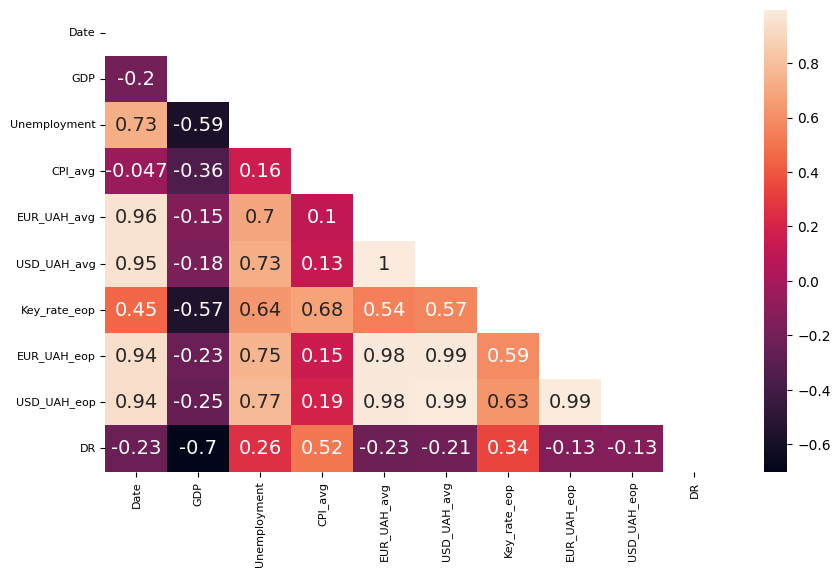

In [10]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(data2.corr(), dtype=bool))
sns.heatmap(data2.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [11]:
# model determination
DR = data2["DR"]
macro = data2.drop(['DR'], axis = 1)

macro = sm.add_constant(macro)
regression = sm.OLS(DR, macro)

In [12]:
# model result
result = regression.fit()

pd.DataFrame({'coef': result.params, 'P_value': round(result.pvalues,3)})
# P-value should be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
const,9.413821e+00,0.668
Date,-4.713167e-07,0.666
GDP,-3.848576e-03,0.111
Unemployment,1.825935e-02,0.114
CPI_avg,3.777690e-03,0.088
EUR_UAH_avg,2.372691e-02,0.239
USD_UAH_avg,-2.585996e-02,0.251
Key_rate_eop,-3.487831e-03,0.537
EUR_UAH_eop,4.869670e-03,0.726
USD_UAH_eop,-6.561198e-03,0.760


In [13]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     3.617
Date:                Fri, 16 Feb 2024   Prob (F-statistic):             0.0521
Time:                        08:50:20   Log-Likelihood:                 35.619
No. Observations:                  17   AIC:                            -51.24
Df Residuals:                       7   BIC:                            -42.91
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.4138     21.015      0.448   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
# error - stand dev error
result.bse

const           21.014601
Date             0.000001
GDP              0.002110
Unemployment     0.010114
CPI_avg          0.001905
EUR_UAH_avg      0.018430
USD_UAH_avg      0.020665
Key_rate_eop     0.005371
EUR_UAH_eop      0.013372
USD_UAH_eop      0.020625
dtype: float64

In [31]:
# test linear model
X_incl_const = sm.add_constant(macro)
# X_incl_const = macro

LinReg = LinearRegression()
LinReg.fit( X_incl_const, DR)

r_sq = LinReg.score( X_incl_const, DR)
print("coef of determination - v1:", r_sq )


coef of determination - v1: 0.8230039443592578


In [28]:
# test linear model 2 wo some macro

# now we can drop variables with p_value > 0.05
# X_incl_const = sm.add_constant(macro)
X_incl_const2 = X_incl_const.drop(['Unemployment', 'EUR_UAH_avg', 'USD_UAH_avg', 'Key_rate_eop', 'EUR_UAH_eop', 'USD_UAH_eop', 'Date'], axis = 1)
# GDP	Unemployment	CPI_avg	EUR_UAH_avg	USD_UAH_avg	Key_rate_eop	EUR_UAH_eop	USD_UAH_eop

LinReg = LinearRegression()
LinReg.fit( X_incl_const2, DR)

r_sq = LinReg.score( X_incl_const2, DR)
print("coef of determination - v2:", r_sq )


coef of determination - v2: 0.5736678851281041


In [29]:
# test linear model 3 wo some macro

# now we can drop variables with p_value > 0.05
# X_incl_const = sm.add_constant(macro)
X_incl_const3 = X_incl_const.drop(['Unemployment', 'EUR_UAH_avg', 'USD_UAH_avg',  'EUR_UAH_eop', 'USD_UAH_eop', 'Date'], axis = 1)
# GDP	Unemployment	CPI_avg	EUR_UAH_avg	USD_UAH_avg	Key_rate_eop	EUR_UAH_eop	USD_UAH_eop

LinReg = LinearRegression()
LinReg.fit( X_incl_const3, DR)

r_sq = LinReg.score( X_incl_const3, DR)
print("coef of determination - v3:", r_sq )

coef of determination - v3: 0.6799221296538565


In [30]:
# test linear model 4 wo all macro except GDP

# now we can drop variables with p_value > 0.05
# X_incl_const = sm.add_constant(macro)
X_incl_const4 = X_incl_const.drop(['Unemployment', 'EUR_UAH_avg', 'USD_UAH_avg',  'EUR_UAH_eop', 'USD_UAH_eop', 'Date', 'CPI_avg'], axis = 1)
# GDP	Unemployment	CPI_avg	EUR_UAH_avg	USD_UAH_avg	Key_rate_eop	EUR_UAH_eop	USD_UAH_eop

LinReg = LinearRegression()
LinReg.fit( X_incl_const4, DR)

r_sq = LinReg.score( X_incl_const4, DR)
print("coef of determination - v4:", r_sq )

coef of determination - v4: 0.4969624577333134


# **RESIDUALS = DIFF BETWEEN INPUT DATA AND MODELLING DATA **

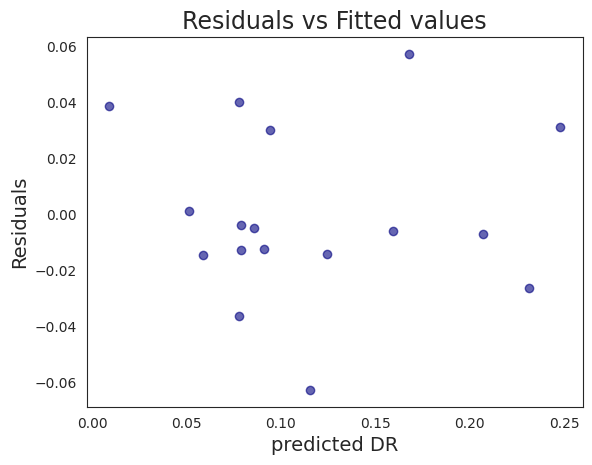

In [32]:
# Residuals vs Predicted level
plt.scatter(x=result.fittedvalues, y =result.resid, c='navy', alpha= 0.6)

plt.xlabel("predicted DR" , fontsize = 14)
plt.ylabel("Residuals" , fontsize = 14)
plt.title("Residuals vs Fitted values" , fontsize = 17)
plt.show()

<ipython-input-33-2a7be3e43912>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid, color = 'navy')


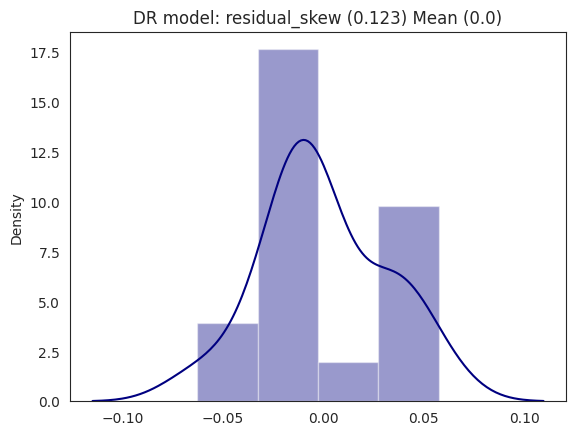

In [33]:
# distribution of residuals
residual_mean = round(result.resid.mean(),3)
residual_skew = round(result.resid.skew(),3)

sns.distplot(result.resid, color = 'navy')
plt.title(f"DR model: residual_skew ({residual_skew}) Mean ({residual_mean})")
plt.show()

# **forecast**

In [44]:
# macro_predicred
# simple LinRegretion
Y_PRED = LinReg.predict(X_incl_const)
print("predicted values according to model:",  Y_PRED)

predicted values according to model: [0.09407038 0.15951274 0.24774187 0.12416882 0.11531626 0.07878065
 0.07900021 0.16762427 0.20713096 0.05140522 0.07790896 0.0589211
 0.00910466 0.08586936 0.09110828 0.23124349 0.07804574]


In [45]:
print('Coefficient of determination/ Level of confidance:', round(LinReg.score(macro, DR),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(DR, Y_PRED))
print('Mean Squared Error:', metrics.mean_squared_error(DR, Y_PRED))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(DR, Y_PRED)))

Coefficient of determination/ Level of confidance: 0.82
Mean Absolute Error: 0.023456203201573784
Mean Squared Error: 0.0008863715692333821
Root Mean Squared Error: 0.029771993034282775


In [39]:
data2

,hist_dat,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop,DR
0,31-12-2007,20071231,8.2,6.4,12.8,6.9,5.1,8.0,7.4,5.1,0.124380
1,31-12-2008,20081231,2.2,6.4,25.3,7.7,5.3,12.0,10.9,7.7,0.153751
2,31-12-2009,20091231,-15.1,8.8,16.0,10.9,7.8,10.3,11.4,8.0,0.279171
3,31-12-2010,20101231,4.1,8.1,9.4,10.5,7.9,7.8,10.6,8.0,0.110035
4,31-12-2011,20111231,5.5,7.9,8.0,11.1,8.0,7.8,10.3,8.0,0.052725
5,31-12-2012,20121231,0.2,7.5,0.6,10.3,8.0,7.5,10.5,8.0,0.066180
6,31-12-2013,20131231,0.0,7.2,-0.3,10.6,8.0,6.5,11.0,8.0,0.075199
7,31-12-2014,20141231,-6.6,9.3,12.1,15.7,11.9,14.0,19.2,15.8,0.225072
8,31-12-2015,20151231,-9.8,9.1,48.5,24.2,21.8,22.0,26.2,24.0,0.200404
9,31-12-2016,20161231,2.4,9.3,14.9,28.3,25.5,14.0,28.4,27.2,0.052723


In [38]:
def int_to_date(data):
  date_str = str(data)
  date = datetime.strptime(date_str, '%Y%m%d')
  return date.strftime('%d-%m-%Y')

data2["hist_dat"] = data['data'].apply(lambda x: int_to_date(x))

formatted_column = data2.pop('hist_dat')
data2.insert(0, 'hist_dat', formatted_column)


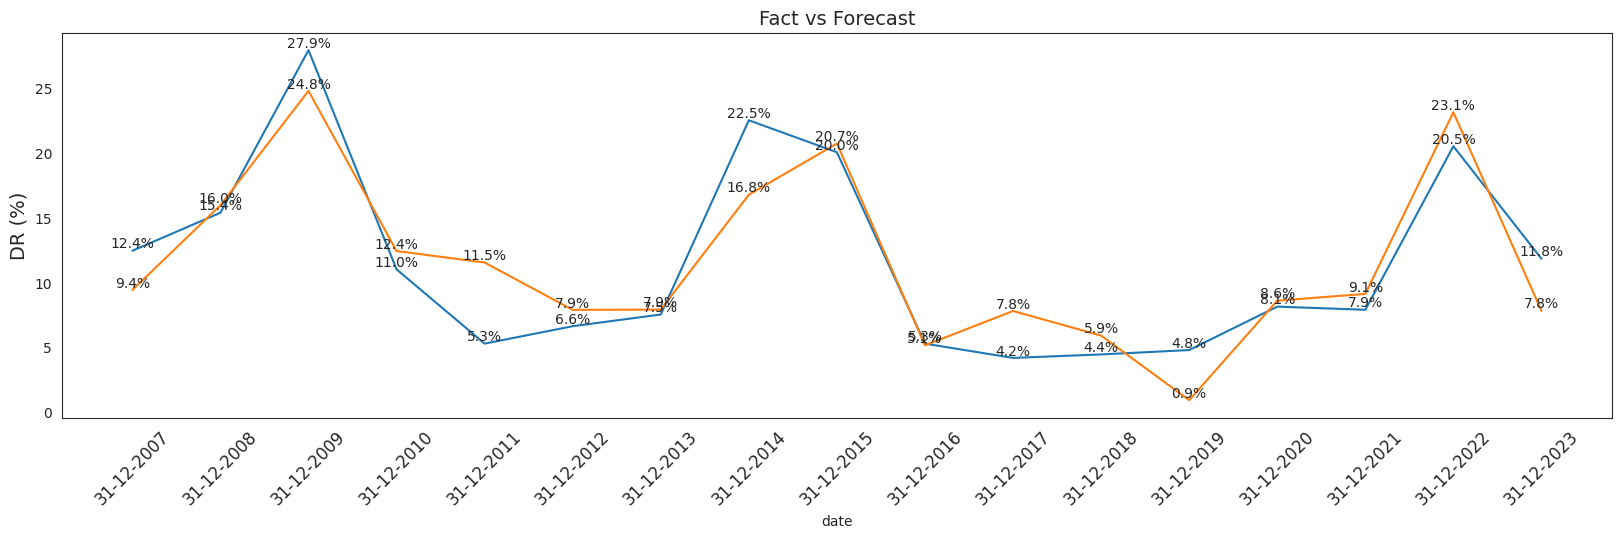

In [56]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data2['hist_dat'], DR * 100, label="act DR (%)")
plt.plot(data2['hist_dat'], Y_PRED * 100, label="predicted DR (%)")

for i in range(len(data2['hist_dat'])):
    plt.text(data2['hist_dat'][i], DR[i] * 100, '{:.1f}%'.format(DR[i] * 100), ha='center', va='bottom')

for i in range(len(data2['hist_dat'])):
    plt.text(data2['hist_dat'][i], Y_PRED[i] * 100, '{:.1f}%'.format(Y_PRED[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast', fontsize=1)

plt.show()

In [106]:
url_f = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/makro_FCST_Y.csv'
date_forecast = pd.read_csv(url_f, sep=';')
print(date_forecast.head())


       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20241231    5            12        7           43           39   
1  20251231    7             9        9           48           42   
2  20261231    6             8        7           51           43   
3  20241231   -8            20       20           46           41   
4  20251231   -5            18       17           59           52   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop   FCST  
0            13           47           41  base   
1            10           49           43  base   
2             8           51           44  base   
3            25           55           48  worst  
4            25           64           55  worst  


In [107]:
macro_new = date_forecast.copy()
# base scenario
macro_base_forecast = macro_new[macro_new['FCST'] != 'worst']
print(macro_base_forecast.head())



       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20241231    5            12        7           43           39   
1  20251231    7             9        9           48           42   
2  20261231    6             8        7           51           43   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop   FCST  
0            13           47           41  base   
1            10           49           43  base   
2             8           51           44  base   


In [109]:
# worse scenario
macro_worse_forecast = macro_new[macro_new['FCST'] == 'worst']
print(macro_worse_forecast.head())


       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
3  20241231   -8            20       20           46           41   
4  20251231   -5            18       17           59           52   
5  20261231   -5            17       14           67           58   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop   FCST  
3            25           55           48  worst  
4            25           64           55  worst  
5            20           70           60  worst  


In [110]:
macro_base_forecast = macro_base_forecast.drop(['FCST'], axis = 1)
macro_worse_forecast = macro_worse_forecast.drop(['FCST'], axis = 1)

In [111]:
macro_base_forecast =  sm.add_constant(macro_base_forecast)
y_forecast_base= LinReg.predict(macro_base_forecast)

In [112]:
print(y_forecast_base)

[0.02634538 0.0148475  0.04364275]


In [91]:
# def int_to_date(data):
#   date_str = str(data)
#   date = datetime.strptime(date_str, '%Y%m%d')
#   return date.strftime('%d-%m-%Y')

macro_base_forecast["hist_dat"] = macro_base_forecast['Date'].apply(lambda x: int_to_date(x))

formatted_column = macro_base_forecast.pop('hist_dat')
macro_base_forecast.insert(0, 'hist_dat', formatted_column)

In [92]:
print(macro_base_forecast)

     hist_dat  const      Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  \
0  31-12-2024    1.0  20241231    5            12        7           43   
1  31-12-2025    1.0  20251231    7             9        9           48   
2  31-12-2026    1.0  20261231    6             8        7           51   

   USD_UAH_avg  Key_rate_eop  EUR_UAH_eop  USD_UAH_eop  
0           39            13           47           41  
1           42            10           49           43  
2           43             8           51           44  


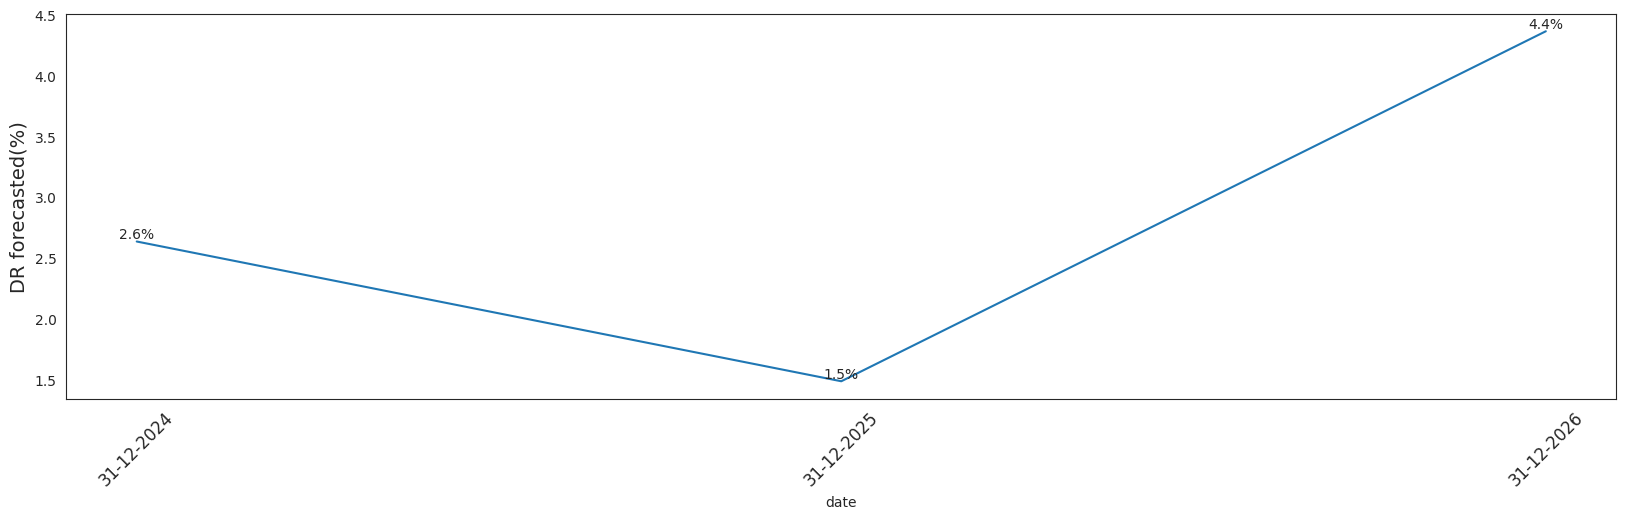

In [93]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(macro_base_forecast['hist_dat'], y_forecast_base * 100, label="forecasted DR (%)")


for i in range(len(macro_base_forecast['hist_dat'])):
    plt.text(macro_base_forecast['hist_dat'][i], y_forecast_base[i] * 100, '{:.1f}%'.format(y_forecast_base[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR forecasted(%)', fontsize=14)


plt.show()

In [113]:
macro_worse_forecast =  sm.add_constant(macro_worse_forecast)
y_forecast_worse= LinReg.predict(macro_worse_forecast)

In [114]:
print(y_forecast_worse)

[0.24219747 0.19997574 0.21417686]


In [116]:
macro_worse_forecast["hist_dat"] = macro_worse_forecast['Date'].apply(lambda x: int_to_date(x))

formatted_column = macro_worse_forecast.pop('hist_dat')
macro_worse_forecast.insert(0, 'hist_dat', formatted_column)

In [118]:
print(macro_worse_forecast)

     hist_dat  const      Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  \
3  31-12-2024    1.0  20241231   -8            20       20           46   
4  31-12-2025    1.0  20251231   -5            18       17           59   
5  31-12-2026    1.0  20261231   -5            17       14           67   

   USD_UAH_avg  Key_rate_eop  EUR_UAH_eop  USD_UAH_eop  
3           41            25           55           48  
4           52            25           64           55  
5           58            20           70           60  


KeyError: 0

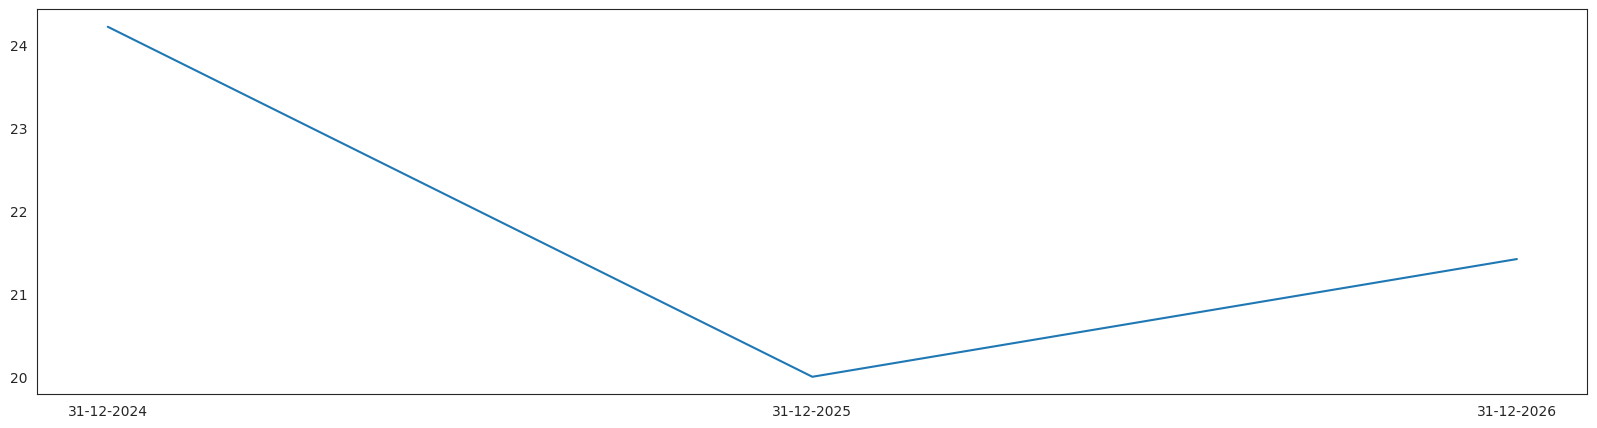

In [123]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(macro_worse_forecast['hist_dat'], y_forecast_worse * 100, label="forecasted worse DR (%)")

for i in range(len(macro_worse_forecast['hist_dat'])):
    plt.text(macro_worse_forecast['hist_dat'][i], y_forecast_worse[i] * 100, '{:.1f}%'.format(y_forecast_worse[i] * 100), ha='center', va='bottom')

plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR forecasted worse(%)', fontsize=14)

plt.show()